In [1]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Loading the data
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# class to describe dataset

class Information:

    # initialize object
    def __init__(self, df):
      self.df = df

    # method to check shape of data
    def show_shape(self):
      print(f"The dataset has {self.df.shape[0]} rows and {self.df.shape[1]} columns.\n")

    # method to check info on dataset
    def show_info(self):
      print("Dataset Information:")
      print(self.df.info(), '\n')

    # method to describe numerical columns
    def show_sm_stats(self):
      stats = self.df.describe()
      return stats

    def display(self):
      self.show_shape()
      self.show_info()
      self.show_sm_stats()

In [4]:
# Instantiating the class
desc = Information(df)

# Checking the data types of the columns
desc.show_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 



In [5]:
# Checking for the shape of the data.
desc.show_shape()

The dataset has 891 rows and 12 columns.



In [6]:
#checking for categorical columns.
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [7]:
#checking for numeric columns.
non_categorical_columns = df.select_dtypes(exclude=['object', 'category'])
non_categorical_columns.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
# Obtaining statistical summary of the dataset
desc.show_sm_stats()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Checking for duplicates.
def count_duplicates(df):
    duplicate_count = df.duplicated().sum()
    return duplicate_count

duplicate_count = count_duplicates(df)
print(duplicate_count)

0


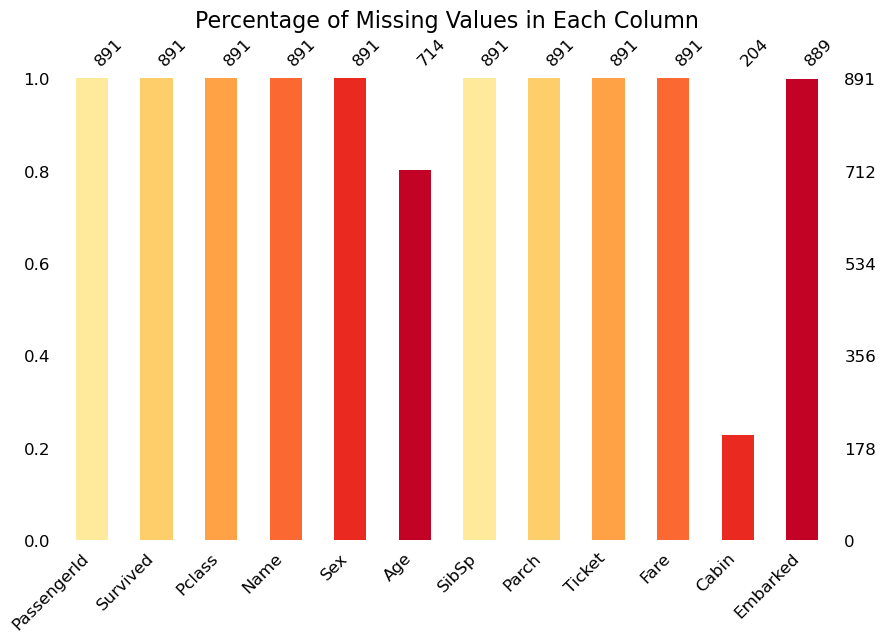

In [10]:
# checking for missing values
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
custom_palette = sns.color_palette("YlOrRd")

# Plot the bar chart with the custom color palette
msno.bar(df, figsize=(10, 6), color=custom_palette, fontsize=12)

# Add title and customize the plot
plt.title('Percentage of Missing Values in Each Column', fontsize=16)
plt.show()

In [11]:
# Filling missing values
# Fill missing 'Age' with median

df['Age'].fillna(df['Age'].median(), inplace=True) 

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  

# Drop the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Confirm that there are no more missing values
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


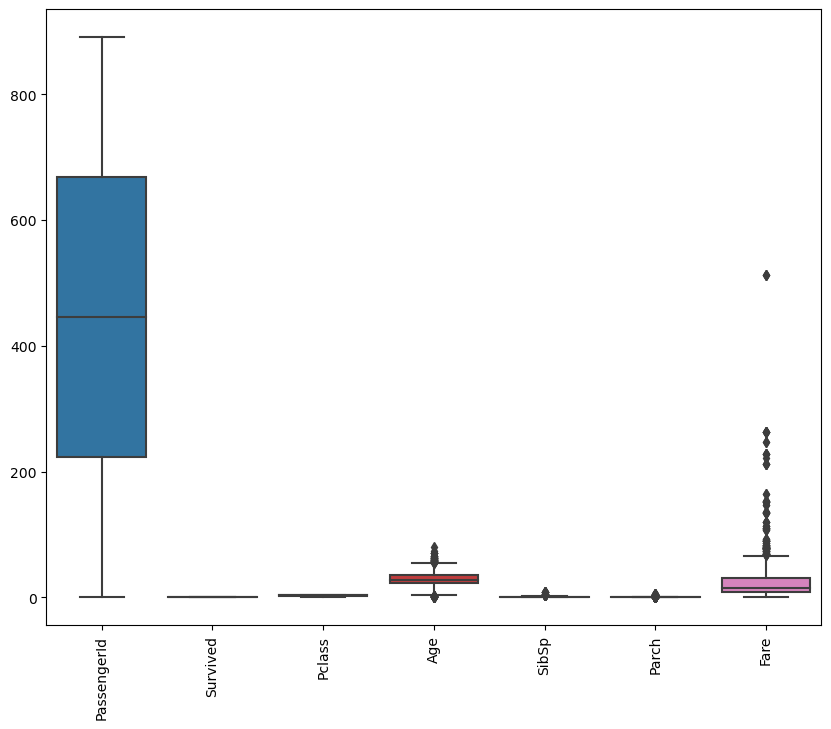

In [12]:
# Visualizing outliers.

# Create box plots for numerical columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [13]:
# Checking numerical columns ('Age', 'Fare') for validity
#We wont be needing the passenger id column
# Defining acceptable ranges or criteria
age_valid_range = (0, 100)  # Example valid age range
fare_valid_range = (0, float('inf'))  # Example valid fare range

# Identify values outside the expected ranges
invalid_age_values = df.loc[~df['Age'].between(*age_valid_range), 'Age']
invalid_fare_values = df.loc[~df['Fare'].between(*fare_valid_range), 'Fare']

# Print the values outside the acceptable ranges
print("Out-of-Range Age Values:")
print(invalid_age_values)

print("\nOut-of-Range Fare Values:")
print(invalid_fare_values)


Out-of-Range Age Values:
Series([], Name: Age, dtype: float64)

Out-of-Range Fare Values:
Series([], Name: Fare, dtype: float64)


In [14]:
# Validating categorical columns ('Sex', 'Embarked')
# Define valid categories
valid_sex_categories = {'male', 'female'}
valid_embarked_categories = {'C', 'Q', 'S'}

# Check for values not in the valid categories
invalid_sex_values = df.loc[~df['Sex'].isin(valid_sex_categories), 'Sex']
invalid_embarked_values = df.loc[~df['Embarked'].isin(valid_embarked_categories), 'Embarked']

# Display the invalid values
print("Invalid Sex Values:")
print(invalid_sex_values)

print("\nInvalid Embarked Values:")
print(invalid_embarked_values)

# Additional checks for consistency
# Convert all values to lowercase for case-insensitive comparison
df['Sex_lower'] = df['Sex'].str.lower()
df['Embarked_upper'] = df['Embarked'].str.upper()

# Check for inconsistent case
inconsistent_sex_values = df.loc[df['Sex'] != df['Sex_lower'], ['Sex', 'Sex_lower']]
inconsistent_embarked_values = df.loc[df['Embarked'] != df['Embarked_upper'], ['Embarked', 'Embarked_upper']]

# Display inconsistent case values
print("\nInconsistent Sex Values:")
print(inconsistent_sex_values)

print("\nInconsistent Embarked Values:")
print(inconsistent_embarked_values)

# Clean up temporary columns
df.drop(['Sex_lower', 'Embarked_upper'], axis=1, inplace=True)


Invalid Sex Values:
Series([], Name: Sex, dtype: object)

Invalid Embarked Values:
Series([], Name: Embarked, dtype: object)

Inconsistent Sex Values:
Empty DataFrame
Columns: [Sex, Sex_lower]
Index: []

Inconsistent Embarked Values:
Empty DataFrame
Columns: [Embarked, Embarked_upper]
Index: []


In [15]:
# Validating categorical columns ('Sex', 'Embarked')
# Define valid categories
valid_sex_categories = {'male', 'female'}
valid_embarked_categories = {'C', 'Q', 'S'}

# Check for values not in the valid categories
invalid_sex_values = df.loc[~df['Sex'].isin(valid_sex_categories), 'Sex']
invalid_embarked_values = df.loc[~df['Embarked'].isin(valid_embarked_categories), 'Embarked']

# Display the invalid values
print("Invalid Sex Values:")
print(invalid_sex_values)

print("\nInvalid Embarked Values:")
print(invalid_embarked_values)

# Additional checks for consistency
# Convert all values to lowercase for case-insensitive comparison
df['Sex_lower'] = df['Sex'].str.lower()
df['Embarked_upper'] = df['Embarked'].str.upper()

# Check for inconsistent case
inconsistent_sex_values = df.loc[df['Sex'] != df['Sex_lower'], ['Sex', 'Sex_lower']]
inconsistent_embarked_values = df.loc[df['Embarked'] != df['Embarked_upper'], ['Embarked', 'Embarked_upper']]

# Display inconsistent case values
print("\nInconsistent Sex Values:")
print(inconsistent_sex_values)

print("\nInconsistent Embarked Values:")
print(inconsistent_embarked_values)

# Check for uniformity (leading/trailing whitespaces)
non_uniform_sex_values = df.loc[df['Sex'].str.strip() != df['Sex'], 'Sex']
non_uniform_embarked_values = df.loc[df['Embarked'].str.strip() != df['Embarked'], 'Embarked']

# Display non-uniform values
print("\nNon-Uniform Sex Values:")
print(non_uniform_sex_values)

print("\nNon-Uniform Embarked Values:")
print(non_uniform_embarked_values)

# Clean up temporary columns
df.drop(['Sex_lower', 'Embarked_upper'], axis=1, inplace=True)


Invalid Sex Values:
Series([], Name: Sex, dtype: object)

Invalid Embarked Values:
Series([], Name: Embarked, dtype: object)

Inconsistent Sex Values:
Empty DataFrame
Columns: [Sex, Sex_lower]
Index: []

Inconsistent Embarked Values:
Empty DataFrame
Columns: [Embarked, Embarked_upper]
Index: []

Non-Uniform Sex Values:
Series([], Name: Sex, dtype: object)

Non-Uniform Embarked Values:
Series([], Name: Embarked, dtype: object)


Column: Sex
Unique Values: ['male' 'female']
Value Counts:
 male      577
female    314
Name: Sex, dtype: int64
----------------------------
Column: Embarked
Unique Values: ['S' 'C' 'Q']
Value Counts:
 S    646
C    168
Q     77
Name: Embarked, dtype: int64
----------------------------
Column: Survived
Unique Values: [0 1]
Value Counts:
 0    549
1    342
Name: Survived, dtype: int64
----------------------------


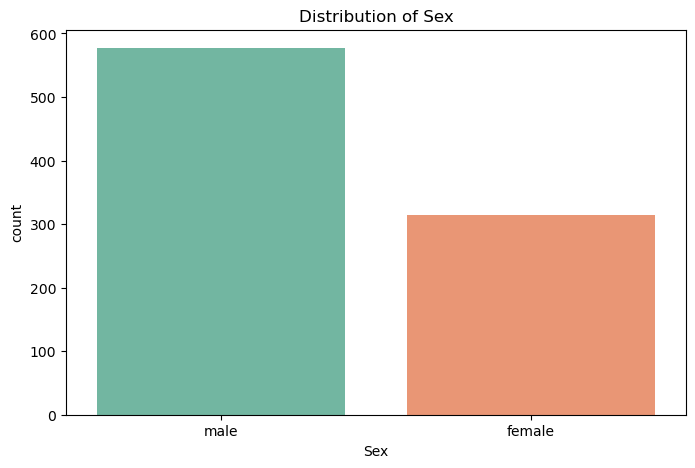

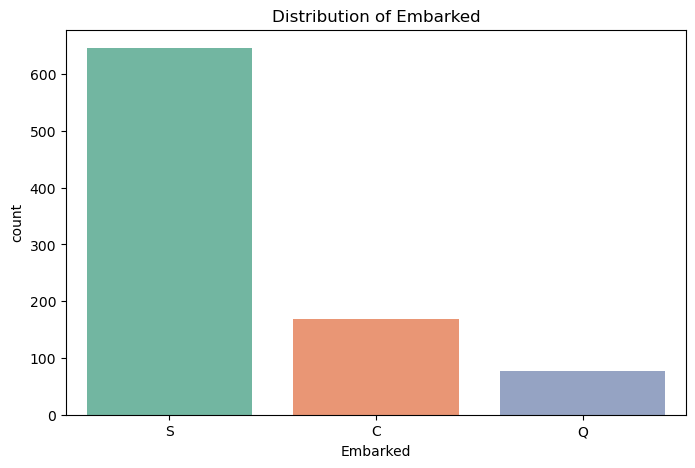

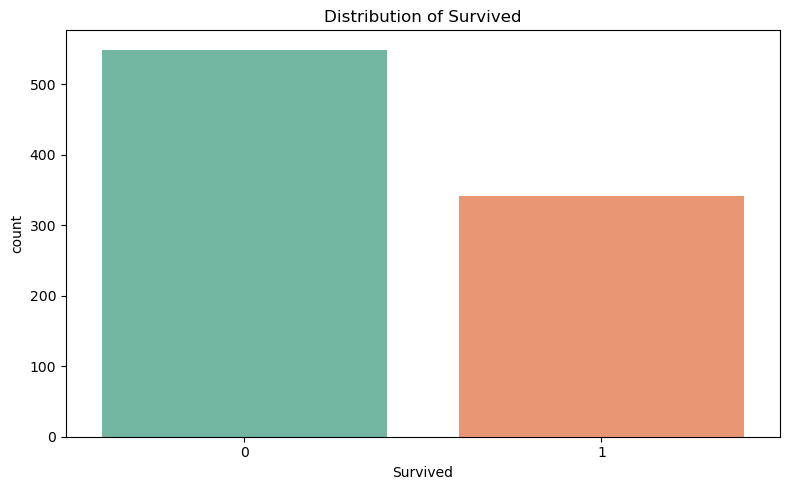

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def check_uniformity(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        value_counts = dataframe[column].value_counts()

        print(f"Column: {column}")
        print("Unique Values:", unique_values)
        print("Value Counts:\n", value_counts)
        print("----------------------------")

        # Plot a bar chart for value counts with custom colors
        plt.figure(figsize=(8, 5))
        sns.countplot(x=dataframe[column], palette='Set2')  # Change 'Set2' to the desired palette
        plt.title(f'Distribution of {column}')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Display all the plots together
    plt.show()

# Specify the columns you want to check for uniformity
columns_to_check = ['Sex', 'Embarked', 'Survived']

# Call the function
check_uniformity(df, columns_to_check)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a categorical variable 'TravelAlone' based on passenger's companionship
df['TravelAlone'] = df['SibSp'] + df['Parch']
df['TravelAlone'] = df['TravelAlone'].map(lambda x: 1 if x == 0 else 0)

# Utilize LabelEncoder to encode the 'TravelAlone' variable
label_encoder = LabelEncoder()
df['TravelAlone'] = label_encoder.fit_transform(df['TravelAlone'])

# Display the updated DataFrame
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [18]:
# 'PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch' are considered less relevant
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
df= df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [19]:
#previewing data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
